In [11]:
import json
import matplotlib.pyplot as plt

def plot_evaluation_metrics(dataset_name, known_rate, file_path='evaluation_results.json'):
    # Load the JSON data
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Filter for specified dataset and known_rate
    filtered_data = [entry for entry in data if entry['dataset'] == dataset_name and entry['known_rate'] == known_rate]
    
    # Prepare data for plotting
    u_values = [entry['u'] for entry in filtered_data]
    if 'test_f1-mean' in filtered_data[0]:  # Check if F1 score is used
        test_metric_means = [entry['test_f1-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_f1-std'] for entry in filtered_data]
        metric_label = 'F1 Mean'
    else:  # Use R2 score
        test_metric_means = [entry['test_r2-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_r2-std'] for entry in filtered_data]
        metric_label = 'R2 Mean'
    
    # Create plot
    plt.figure(figsize=(4, 3))
    plt.errorbar(u_values, test_metric_means, yerr=test_metric_stds, fmt='-o', capsize=5, label=f'{metric_label} ± Std')
    plt.title(f'{dataset_name.capitalize()} Dataset Known Rate {known_rate} - {metric_label}')
    plt.xlabel('U (or J) Values')
    plt.ylabel(f'Test {metric_label}')
    plt.grid(True)
    plt.show()

# Example usage:
# plot_evaluation_metrics('miniboone', 0.6)


In [3]:
import json
import matplotlib.pyplot as plt

def plot_evaluation_metrics(dataset_name, known_rate, file_path='evaluation_results.json'):
    # Load the JSON data
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Filter for specified dataset and known_rate
    filtered_data = [entry for entry in data if entry['dataset'] == dataset_name and entry['known_rate'] == known_rate]
    
    # Check if data exists
    if not filtered_data:
        print(f"No data available for dataset: {dataset_name} with known rate: {known_rate}")
        return
    
    # Prepare data for plotting
    u_values = [entry['u'] for entry in filtered_data]
    if 'test_f1-mean' in filtered_data[0]:  # Check if F1 score is used
        test_metric_means = [entry['test_f1-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_f1-std'] for entry in filtered_data]
        metric_label = 'F1 Mean'
    else:  # Use R2 score
        test_metric_means = [entry['test_r2-mean'] for entry in filtered_data]
        test_metric_stds = [entry['test_r2-std'] for entry in filtered_data]
        metric_label = 'R2 Mean'
    
    # Plotting logic
    plt.errorbar(u_values, test_metric_means, yerr=test_metric_stds, fmt='-o', capsize=5, label=f'{metric_label} ± Std')
    plt.title(f'{dataset_name.capitalize()} Rate {known_rate}')
    plt.xlabel('U (or J) Values')
    plt.ylabel(f'{metric_label}')
    plt.grid(True)

def plot_multiple_datasets(dataset_names, known_rates, file_path='evaluation_results.json'):
    rows = len(dataset_names) * len(known_rates)
    cols = 3  # Number of plots per row
    plt.figure(figsize=(5 * cols, 5 * (rows // cols + (rows % cols > 0))))
    i = 1
    for dataset_name in dataset_names:
        for rate in known_rates:
            plt.subplot(rows // cols + (rows % cols > 0), cols, i)
            print(f"Plotting for dataset: {dataset_name} with known rate: {rate}")
            plot_evaluation_metrics(dataset_name, rate, file_path)
            i += 1
    plt.tight_layout()
    plt.show()

# Example usage:
# dataset_names = ['miniboone', 'abalone', 'adult']
# known_rates = [0.6, 0.9]
# plot_multiple_datasets(dataset_names, known_rates)


Plotting for dataset: abalone with known rate: 0.6
Plotting for dataset: abalone with known rate: 0.9
Plotting for dataset: adult with known rate: 0.6
Plotting for dataset: adult with known rate: 0.9
Plotting for dataset: california with known rate: 0.6
Plotting for dataset: california with known rate: 0.9
Plotting for dataset: buddy with known rate: 0.6
Plotting for dataset: buddy with known rate: 0.9
Plotting for dataset: cardio with known rate: 0.6
Plotting for dataset: cardio with known rate: 0.9
Plotting for dataset: churn2 with known rate: 0.6
Plotting for dataset: churn2 with known rate: 0.9
Plotting for dataset: diabetes with known rate: 0.6
Plotting for dataset: diabetes with known rate: 0.9
Plotting for dataset: gesture with known rate: 0.6
Plotting for dataset: gesture with known rate: 0.9
Plotting for dataset: higgs-small with known rate: 0.6
Plotting for dataset: higgs-small with known rate: 0.9
Plotting for dataset: house with known rate: 0.6
Plotting for dataset: house w

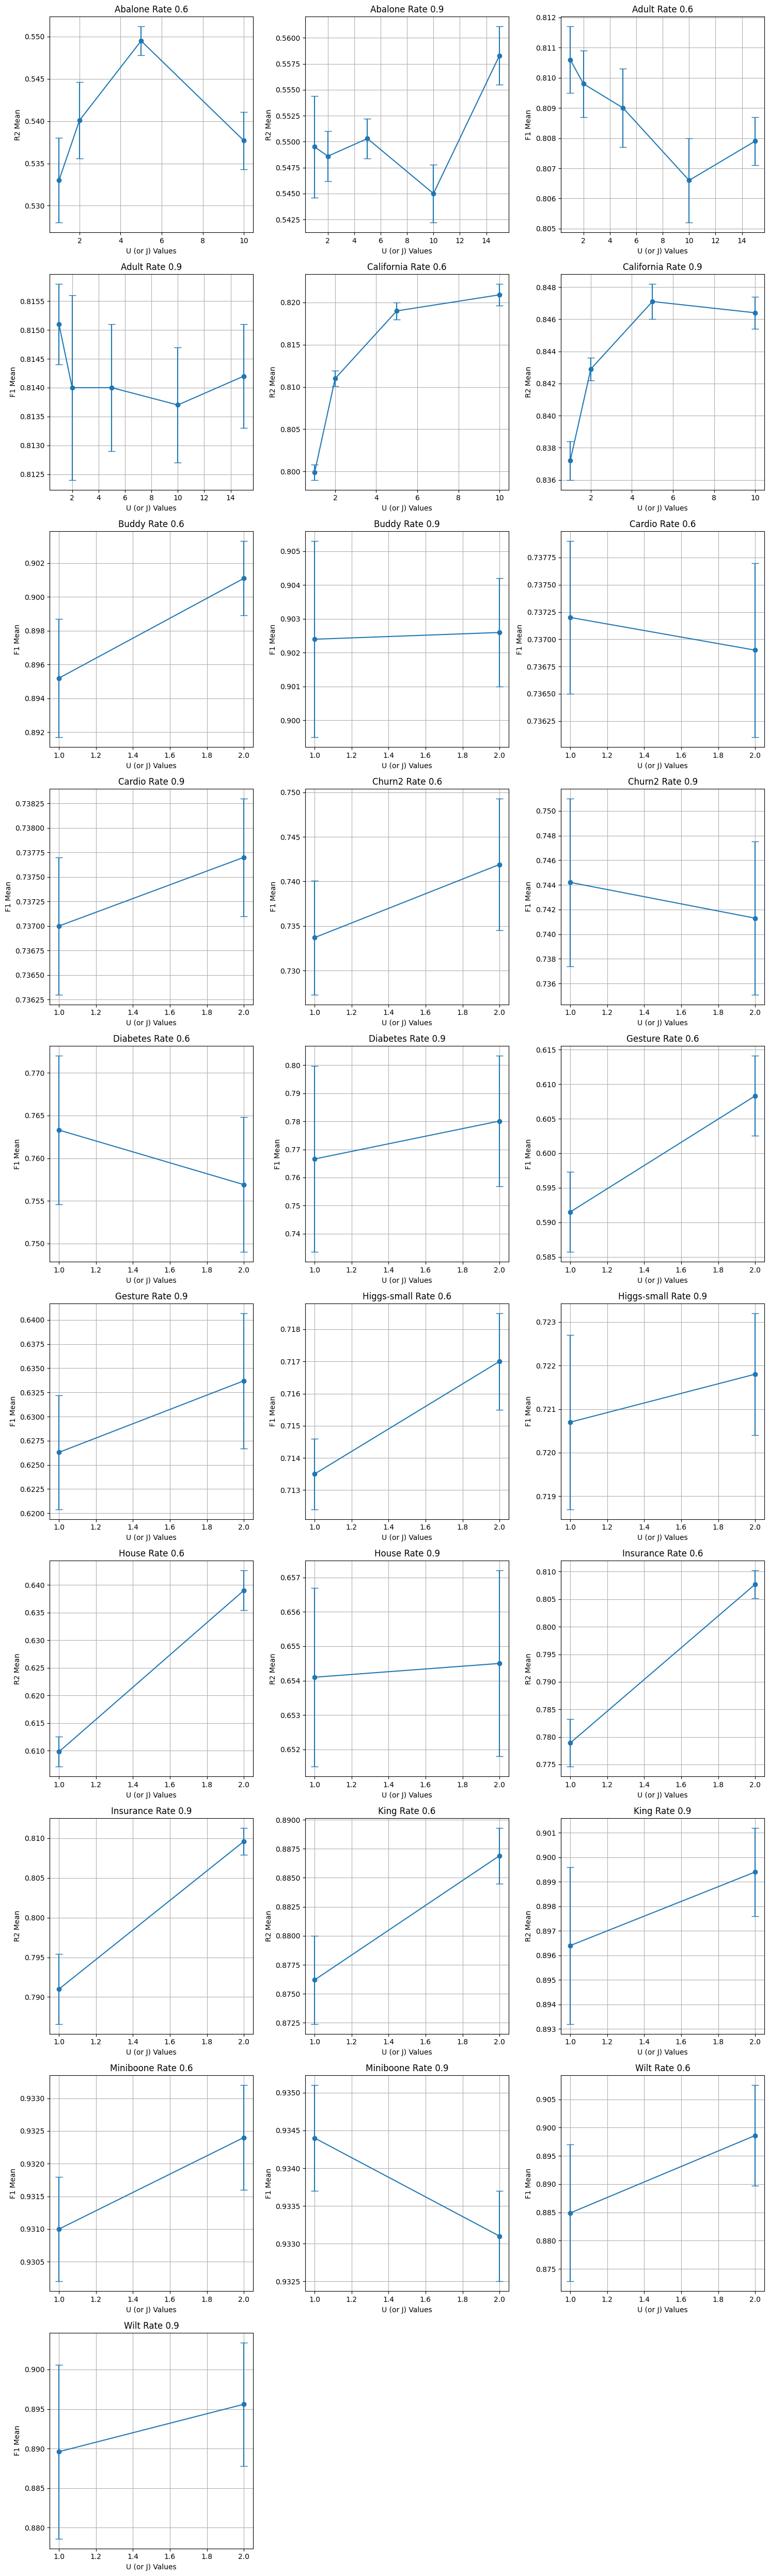

In [5]:
datasets = ["abalone", "adult", "california", "buddy", "cardio", "churn2", "diabetes", 
            "gesture", "higgs-small", "house", "insurance", "king", "miniboone", "wilt"]
known_rates = [0.6, 0.9]
plot_multiple_datasets(datasets, known_rates)